In [1]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd  
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import pickle

# fetch dataset 
predict_students_dropout_and_academic_success = fetch_ucirepo(id=697) 
  
# data (as pandas dataframes) 
X = predict_students_dropout_and_academic_success.data.features 
y = predict_students_dropout_and_academic_success.data.targets 
# convet y to numerical values 0 if Dropout 1 if Enrolled 2 if Graduate in Y df
Y = y.replace({'Dropout': 0, 'Enrolled': 2, 'Graduate': 1})
print(Y.value_counts())
# print shape of X and Y
print(X.shape)
print(Y.shape)

data = pd.concat([X, Y], axis=1)
# delete the rows with target value enrolled = 2
data = data[data['Target'] != 2]
# split the data into train and test
X = data.drop('Target', axis=1)
Y = data['Target']

# metadata 
print(predict_students_dropout_and_academic_success.metadata) 
  
# variable information 
print(predict_students_dropout_and_academic_success.variables) 
#print the name of the columns
print(X.columns)

Target
1         2209
0         1421
2          794
Name: count, dtype: int64
(4424, 36)
(4424, 1)
{'uci_id': 697, 'name': "Predict students' dropout and academic success", 'repository_url': 'https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success', 'data_url': 'https://archive.ics.uci.edu/static/public/697/data.csv', 'abstract': "A dataset created from a higher education institution (acquired from several disjoint databases) related to students enrolled in different undergraduate degrees, such as agronomy, design, education, nursing, journalism, management, social service, and technologies.\nThe dataset includes information known at the time of student enrollment (academic path, demographics, and social-economic factors) and the students' academic performance at the end of the first and second semesters. \nThe data is used to build classification models to predict students' dropout and academic sucess. The problem is formulated as a three category classif

#Data Cleaning

In [2]:
import pandas as pd
#concatenate the dataframes
df = pd.concat([X, Y], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3630 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital Status                                  3630 non-null   int64  
 1   Application mode                                3630 non-null   int64  
 2   Application order                               3630 non-null   int64  
 3   Course                                          3630 non-null   int64  
 4   Daytime/evening attendance                      3630 non-null   int64  
 5   Previous qualification                          3630 non-null   int64  
 6   Previous qualification (grade)                  3630 non-null   float64
 7   Nacionality                                     3630 non-null   int64  
 8   Mother's qualification                          3630 non-null   int64  
 9   Father's qualification                        

In [3]:
df.isnull().sum()

Marital Status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [4]:
df.shape

(3630, 37)

In [5]:
df.size

134310

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Marital Status,3630.0,1.184298,0.613009,1.00,1.000000,1.000000,1.00,6.000000
Application mode,3630.0,18.421763,17.358595,1.00,1.000000,17.000000,39.00,57.000000
Application order,3630.0,1.750138,1.333831,0.00,1.000000,1.000000,2.00,6.000000
Course,3630.0,8853.980992,2068.760082,33.00,9085.000000,9254.000000,9556.00,9991.000000
Daytime/evening attendance,3630.0,0.887603,0.315897,0.00,1.000000,1.000000,1.00,1.000000
Previous qualification,3630.0,4.532231,10.024134,1.00,1.000000,1.000000,1.00,43.000000
Previous qualification (grade),3630.0,132.920606,13.238373,95.00,125.000000,133.100000,140.00,190.000000
Nacionality,3630.0,1.828099,6.667614,1.00,1.000000,1.000000,1.00,109.000000
Mother's qualification,3630.0,19.986226,15.585278,1.00,2.000000,19.000000,37.00,44.000000
Father's qualification,3630.0,22.571625,15.275453,1.00,3.000000,19.000000,37.00,44.000000


In [7]:
df['Target'].value_counts()

Target
1    2209
0    1421
Name: count, dtype: int64

C:\Users\usalv\AppData\Local\Temp\ipykernel_37496\2240609462.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Target'])
c:\Users\usalv\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Target', ylabel='Density'>

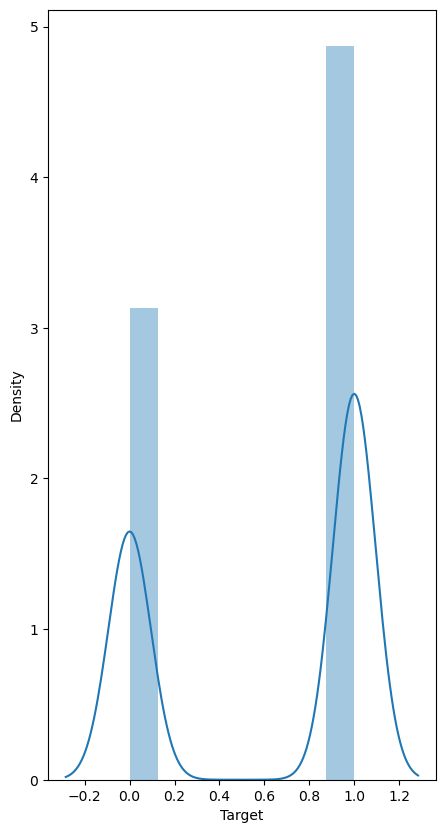

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 10))
sns.distplot(df['Target'])

([<matplotlib.axis.XTick at 0x202093f6090>,
 [Text(0, 0, 'Dropout'), Text(1, 0, 'Graduate')])

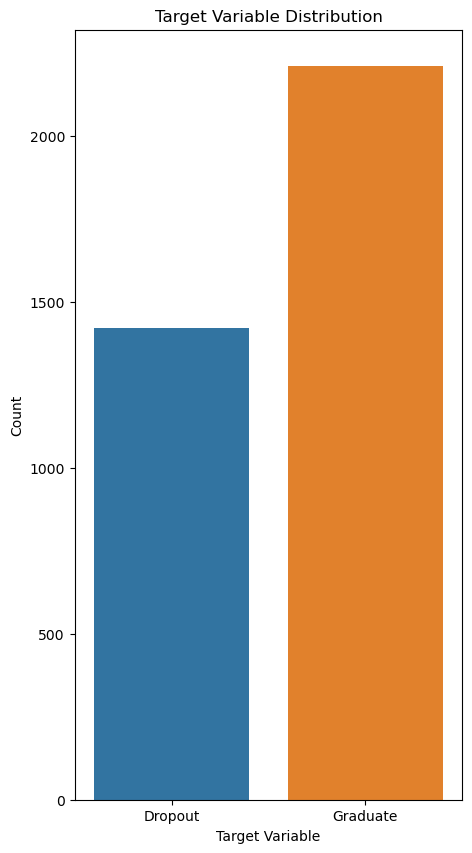

In [9]:
plt.figure(figsize=(5, 10))
#plot the target variable in a bar chart
sns.countplot(x='Target', data=df)
#set a title and labels 
plt.title('Target Variable Distribution')
plt.xlabel('Target Variable')
plt.ylabel('Count')
#set x axis if 0 then Dropout if 1 then Graduate
plt.xticks([0, 1], ['Dropout', 'Graduate'])




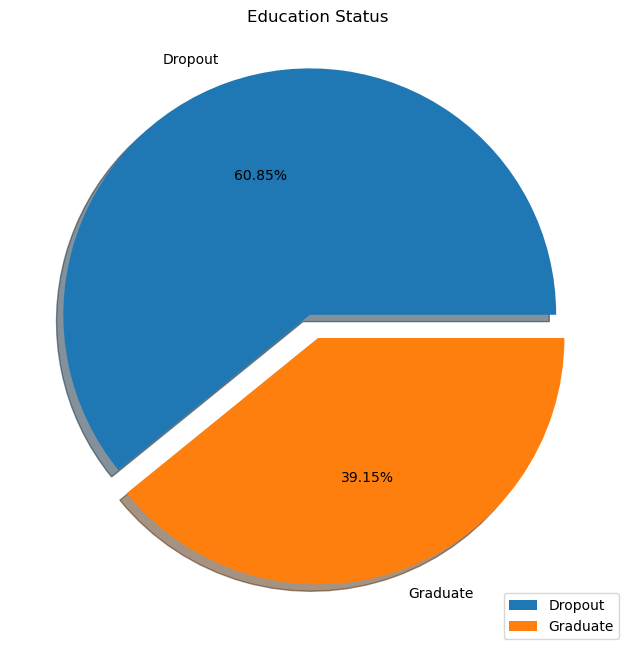

In [10]:
plt.figure(figsize=(8, 8))
plt.title("Education Status")
plt.pie(df['Target'].value_counts(), labels = ['Dropout', 'Graduate'], explode = (0.1, 0), autopct='%1.2f%%', shadow = True)
plt.legend( loc = 'lower right')

C:\Users\usalv\AppData\Local\Temp\ipykernel_37496\3898062606.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.iloc[:, i], color='blue')
c:\Users\usalv\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\usalv\AppData\Local\Temp\ipykernel_37496\3898062606.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
simi

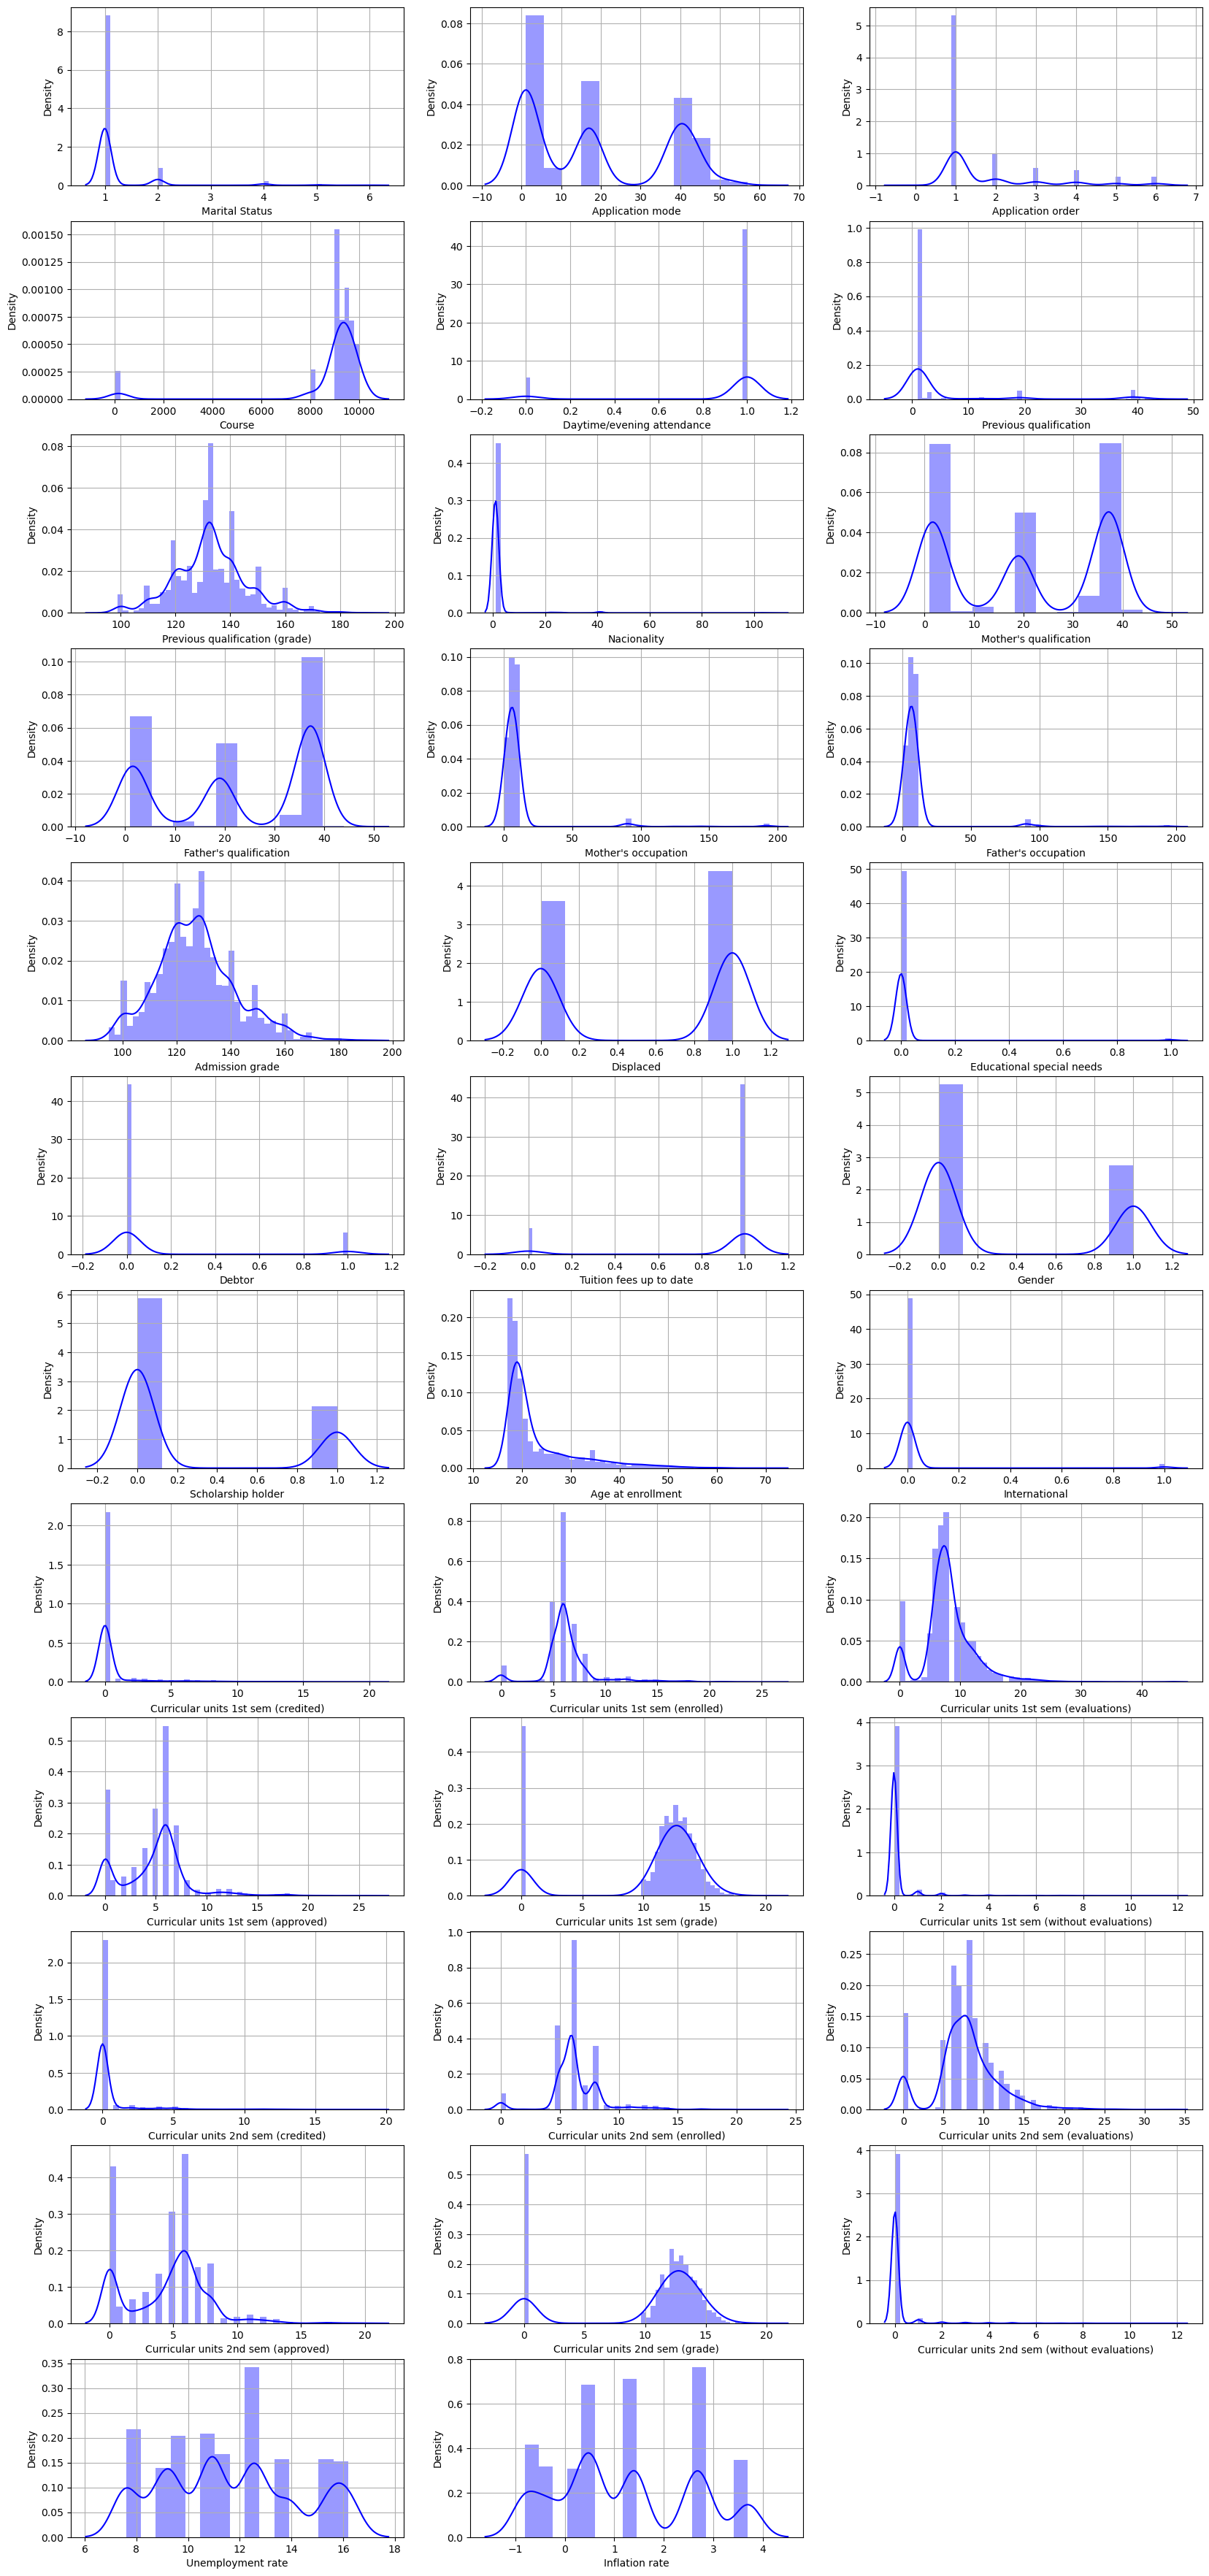

In [11]:
plt.figure(figsize=(20, 45))

for i in range(0, 35):
    plt.subplot(12,3,i+1)
    sns.distplot(df.iloc[:, i], color='blue')
    plt.grid()

# Under-sapling Data

In [12]:
#import under and over sampling libraries
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE

In [13]:
#random under sampling
rus = SMOTE()
X, Y = rus.fit_resample(X, Y)

Target
0    2209
1    2209
Name: count, dtype: int64


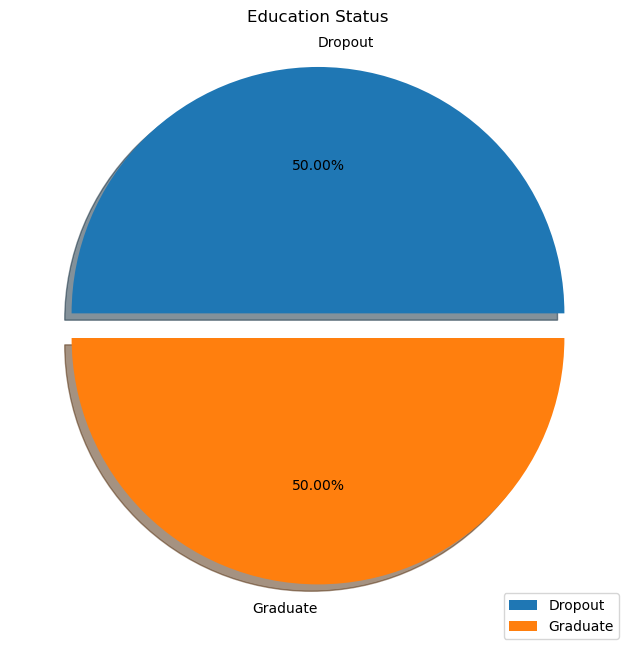

In [14]:
plt.figure(figsize=(8, 8))
plt.title("Education Status")
plt.pie(Y.value_counts(), labels = ['Dropout', 'Graduate'], explode = (0.1, 0), autopct='%1.2f%%', shadow = True)
plt.legend( loc = 'lower right')
print(Y.value_counts())

#Traning

In [15]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, recall_score, ConfusionMatrixDisplay

def perform(y_pred, y_test):
    print("Accuracy : ", accuracy_score(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    print("\n", cm)
    print("\n")
    print("**"*27 + "\n" + " "* 16 + "Classification Report\n" + "**"*27)
    print(classification_report(y_test, y_pred))
    print("**"*27+"\n")
    cm = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['Non-Dropout', 'Dropout'])
    cm.plot()


In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import ClusterCentroids
from sklearn.svm import SVC


def train_sub_model(test_size=0.2, random_state=1, keep_list=X.columns):
    X_f = X[keep_list]
    scaler = StandardScaler()
    scaler.fit(X_f)
    X_f = scaler.transform(X_f)
    
    X_train, X_test, Y_train, Y_test = train_test_split(X_f, Y, test_size=test_size, random_state=random_state)
    
    cc = ClusterCentroids(random_state=42)
    X_resampled, Y_resampled = cc.fit_resample(X_train, Y_train)

    # Logistic Regression
    logisticRegr = LogisticRegression()
    logisticRegr.fit(X_resampled, Y_resampled)

    y_pred_lr = logisticRegr.predict(X_test)
    x_true_pred_lr = scaler.inverse_transform(X_test[y_pred_lr == 1])

    l_lr = []
    l_lr.append(x_true_pred_lr[0])

    print("Logistic Regression:")
    perform(y_pred_lr, Y_test)

    # Random Forest
    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_classifier.fit(X_resampled, Y_resampled)

    y_pred_rf = rf_classifier.predict(X_test)
    x_true_pred_rf = scaler.inverse_transform(X_test[y_pred_rf == 1])

    l_rf = []
    l_rf.append(x_true_pred_rf[0])

    print("Random Forest:")
    perform(y_pred_rf, Y_test)

    # Support Vector Machine
    svm_classifier = SVC(kernel='rbf', random_state=42)
    svm_classifier.fit(X_resampled, Y_resampled)

    y_pred_svm = svm_classifier.predict(X_test)
    x_true_pred_svm = scaler.inverse_transform(X_test[y_pred_svm == 1])

    l_svm = []
    l_svm.append(x_true_pred_svm[0])

    print("Support Vector Machine:")
    perform(y_pred_svm, Y_test)

    # Ensemble Voting
    y_pred_mv = ensemble_voting(logisticRegr, rf_classifier, svm_classifier, X_test)
    #print dimension of the array
    x_true_pred_mv = scaler.inverse_transform(X_test[y_pred_mv == 1])

    l_mv = []
    l_mv.append(x_true_pred_mv[0])
    

    print("Ensemble Voting:")
    perform(y_pred_mv, Y_test)


    return logisticRegr, rf_classifier, svm_classifier , scaler, l_mv

import numpy as np

def ensemble_voting(logisticRegr, rf_classifier, svm_classifier, X_test):

    y_pred_lr = logisticRegr.predict(X_test)
    y_pred_rf = rf_classifier.predict(X_test)
    y_pred_nb = svm_classifier.predict(X_test)

    # Majority Voting
    majority_voting = []
    for i in range(len(y_pred_lr)):
        majority_vote_i = 0
        if  y_pred_lr[i]+ y_pred_rf[i] + y_pred_nb[i] >= 2:
            majority_vote_i = 1
        majority_voting.append(majority_vote_i)
    
    #to array
    majority_voting = np.array(majority_voting)
    return majority_voting


# First Model

Prepare the training data for this first model:

## Selected Columns
- Age at enrollment
- Previous qualification (grade)
- Admission grade

## Name of the Model
**Most Basic Features**

c:\Users\usalv\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\usalv\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


c:\Users\usalv\anaconda3\Lib\site-packages\sklearn\base.py:1151: ConvergenceWarning: Number of distinct clusters (1626) found smaller than n_clusters (1755). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


Logistic Regression:
Accuracy :  0.6538461538461539

 [[237 217]
 [ 89 341]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.73      0.52      0.61       454
           1       0.61      0.79      0.69       430

    accuracy                           0.65       884
   macro avg       0.67      0.66      0.65       884
weighted avg       0.67      0.65      0.65       884

******************************************************

Random Forest:
Accuracy :  0.6470588235294118

 [[287 167]
 [145 285]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.66      0.63      0.65       454
           1       0.63      0.66      0.65       430

    a

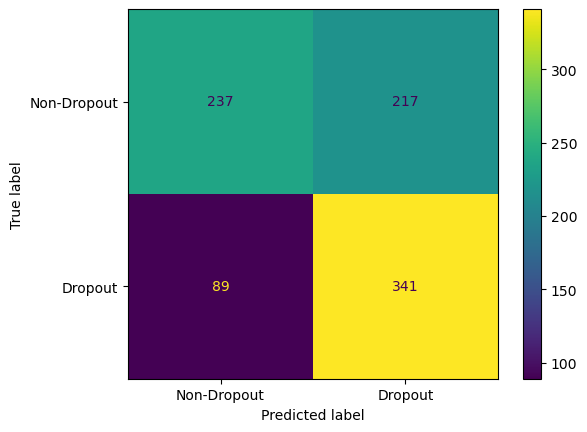

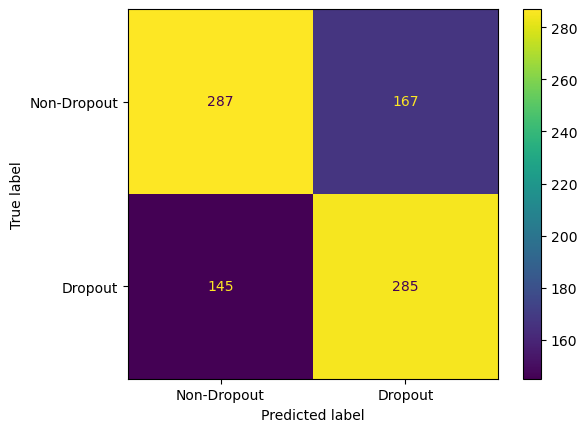

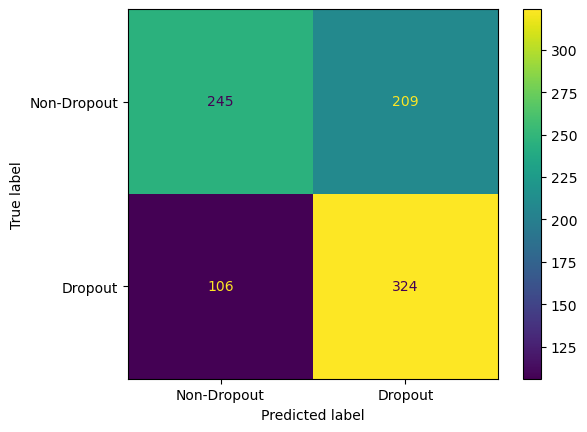

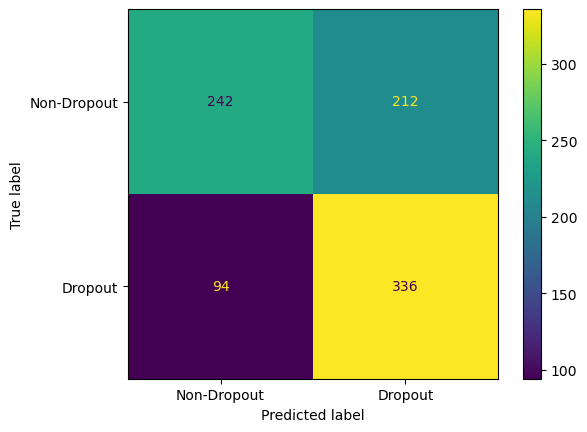

In [17]:
#create a keep list with - Age at enrollment Previous qualification (grade)  Admission grade 
keep_list = ['Age at enrollment', 'Previous qualification (grade)', 'Admission grade']
# train the model with the keep list
model_lr_1, model_rf_1, model_svm_1, scaler_1, pred=train_sub_model(keep_list=keep_list)
print("prediction true : ", pred)

#save the model with pickle
pickle.dump(model_lr_1, open('models/model_lr_1.pkl','wb'))
pickle.dump(model_rf_1, open('models/model_rf_1.pkl','wb'))
pickle.dump(model_svm_1, open('models/model_svm_1.pkl','wb'))
pickle.dump(scaler_1, open('models/scaler_1.pkl','wb'))
pickle.dump(keep_list, open('models/features_1.pkl','wb'))



# Second Model

Prepare the training data for this first model:

## Selected Columns
Age at enrollment
Previous qualification (grade)
Admission grade
Nacionality
Gender

## Name of the Model
**Basic Features**

c:\Users\usalv\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\usalv\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
c:\Users\usalv\anaconda3\Lib\site-packages\sklearn\base.py:1151: ConvergenceWarning: Number of distinct clusters (1680) found smaller than n_clusters (1755). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


Logistic Regression:
Accuracy :  0.666289592760181

 [[265 189]
 [106 324]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.71      0.58      0.64       454
           1       0.63      0.75      0.69       430

    accuracy                           0.67       884
   macro avg       0.67      0.67      0.66       884
weighted avg       0.67      0.67      0.66       884

******************************************************

Random Forest:
Accuracy :  0.6572398190045249

 [[290 164]
 [139 291]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.68      0.64      0.66       454
           1       0.64      0.68      0.66       430

    ac

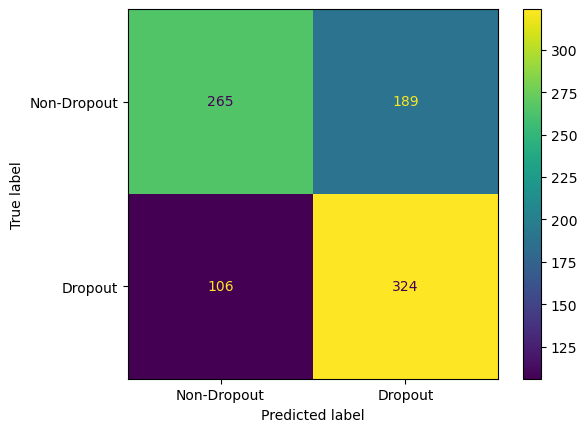

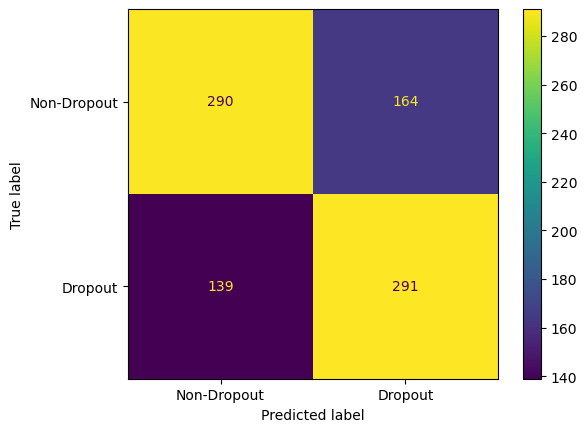

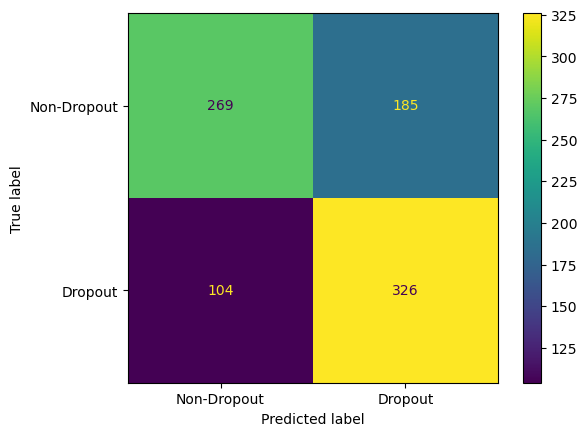

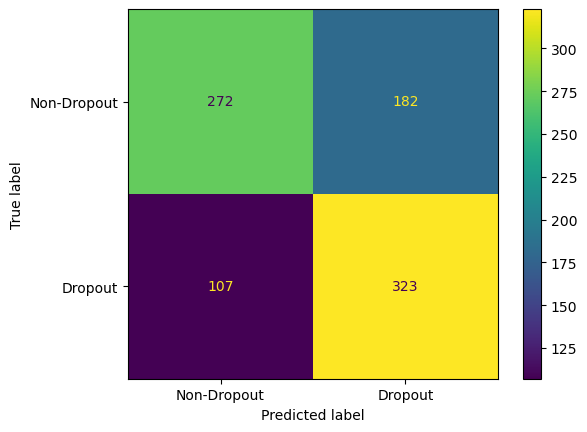

In [18]:
#create a keep list with makdown list
keep_list = ['Age at enrollment','Previous qualification (grade)','Admission grade','Nacionality','Gender']
# train the model with the keep list
model_lr_2,model_rf_2 , model_svm_2 ,scaler_2, pred=train_sub_model(keep_list=keep_list)
print("prediction true : ", pred)


#save the model with pickle
pickle.dump(model_lr_2, open('models/model_lr_2.pkl','wb'))
pickle.dump(model_rf_2, open('models/model_rf_2.pkl','wb'))
pickle.dump(model_svm_2, open('models/model_svm_2.pkl','wb'))
pickle.dump(scaler_2, open('models/scaler_2.pkl','wb'))
pickle.dump(keep_list, open('models/features_2.pkl','wb'))

# Third Model

Prepare the training data for this first model:

## Selected Columns
Age at enrollment
Previous qualification (grade)
Admission grade
Nacionality
Gender
Application mode
Educational special needs
Daytime/evening attendance
Course


## Name of the Model
**Basic with academic features**

c:\Users\usalv\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\usalv\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


Logistic Regression:
Accuracy :  0.667420814479638

 [[273 181]
 [113 317]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.71      0.60      0.65       454
           1       0.64      0.74      0.68       430

    accuracy                           0.67       884
   macro avg       0.67      0.67      0.67       884
weighted avg       0.67      0.67      0.67       884

******************************************************

Random Forest:
Accuracy :  0.6968325791855203

 [[322 132]
 [136 294]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.70      0.71      0.71       454
           1       0.69      0.68      0.69       430

    ac

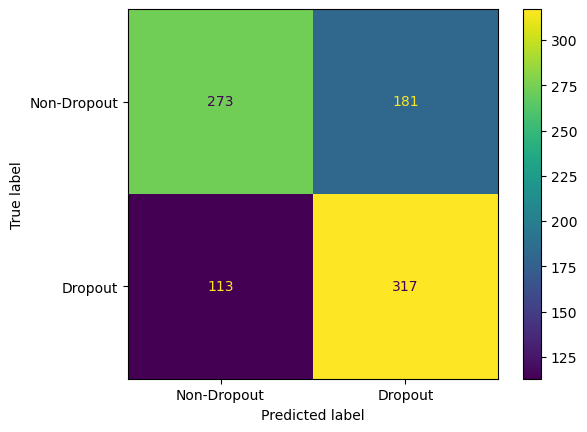

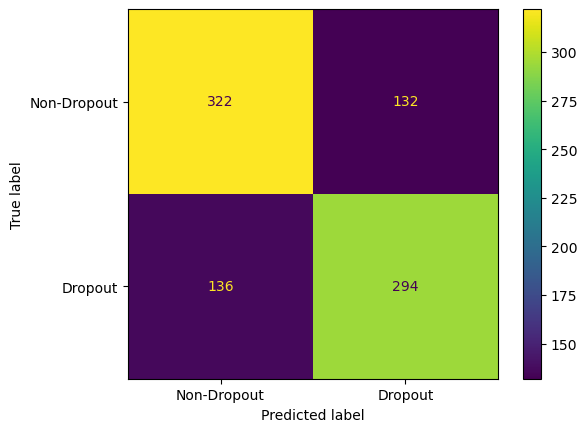

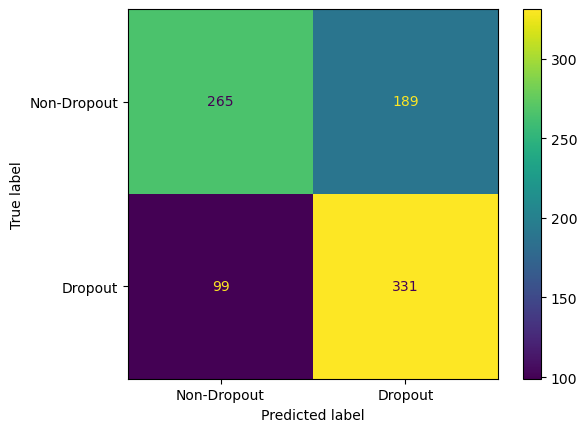

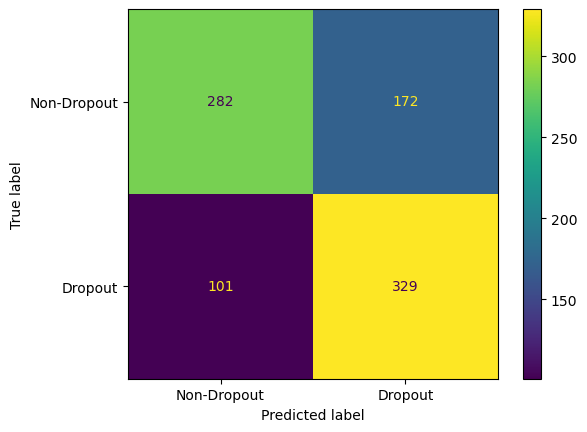

In [19]:
#create a keep list with makdown list
keep_list = ['Age at enrollment','Previous qualification (grade)','Admission grade','Nacionality','Gender','Application mode','Educational special needs','Daytime/evening attendance','Course']
# train the model with the keep list
model_lr_3,model_rf_3 , model_svm_3 ,scaler_3, pred=train_sub_model(keep_list=keep_list)
print("prediction true : ", pred)

#save the model with pickle
pickle.dump(model_lr_3, open('models/model_lr_3.pkl','wb'))
pickle.dump(model_rf_3, open('models/model_rf_3.pkl','wb'))
pickle.dump(model_svm_3, open('models/model_svm_3.pkl','wb'))
pickle.dump(scaler_3, open('models/scaler_3.pkl','wb'))
pickle.dump(keep_list, open('models/features_3.pkl','wb'))


# Fourth Model

Prepare the training data for this first model:

## Selected Columns
Age at enrollment

Previous qualification (grade)
Admission grade
Nacionality
Gender
Debtor
Tuition fees up to date
Scholarship holder
GDP


## Name of the Model
**basic with financial features**

c:\Users\usalv\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\usalv\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


Logistic Regression:
Accuracy :  0.7567873303167421

 [[318 136]
 [ 79 351]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.80      0.70      0.75       454
           1       0.72      0.82      0.77       430

    accuracy                           0.76       884
   macro avg       0.76      0.76      0.76       884
weighted avg       0.76      0.76      0.76       884

******************************************************

Random Forest:
Accuracy :  0.7647058823529411

 [[334 120]
 [ 88 342]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.79      0.74      0.76       454
           1       0.74      0.80      0.77       430

    a

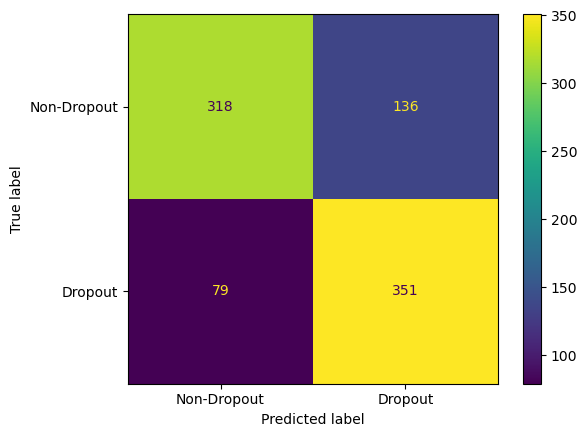

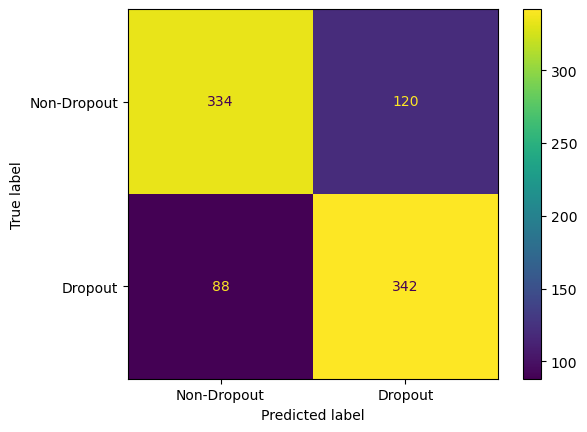

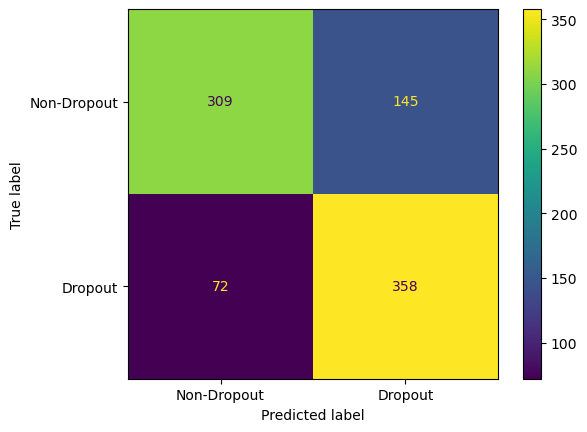

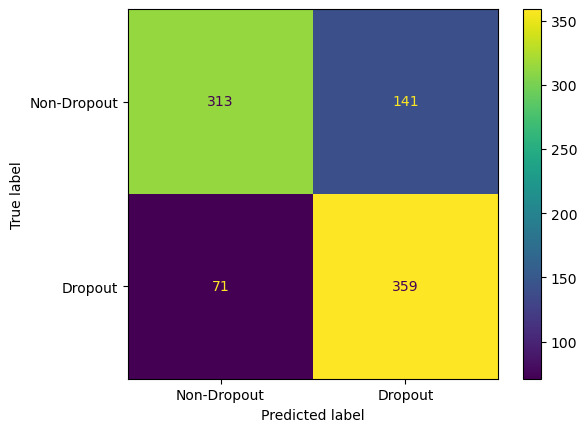

In [20]:
#create a keep list with makdown list
keep_list= [
    "Age at enrollment",
    "Previous qualification (grade)",
    "Admission grade",
    "Nacionality",
    "Gender",
    "Debtor",
    "Tuition fees up to date",
    "Scholarship holder",
    "GDP"
]
# train the model with the keep list
model_lr_4,model_rf_4 , model_svm_4 ,scaler_4, pred=train_sub_model(keep_list=keep_list)
print("prediction true : ", pred)

#save the model with pickle
pickle.dump(model_lr_4, open('models/model_lr_4.pkl','wb'))
pickle.dump(model_rf_4, open('models/model_rf_4.pkl','wb'))
pickle.dump(model_svm_4, open('models/model_svm_4.pkl','wb'))
pickle.dump(scaler_4, open('models/scaler_4.pkl','wb'))
pickle.dump(keep_list, open('models/features_4.pkl','wb'))


# Fifth Model

Prepare the training data for this first model:

## Selected Columns
Age at enrollment

Age at enrollment
Previous qualification (grade)
Admission grade
Nacionality
Gender
Application mode
Educational special needs
Daytime/evening attendance
Course
Curricular units 1st sem (credited)
Curricular units 1st sem (enrolled)
Curricular units 1st sem (evaluations)
Curricular units 1st sem (approved)
Curricular units 1st sem (grade)
Curricular units 1st sem (without evaluations)
Curricular units 2nd sem (credited)
Curricular units 2nd sem (enrolled)
Curricular units 2nd sem (evaluations)
Curricular units 2nd sem (approved)
Curricular units 2nd sem (grade)
Curricular units 2nd sem (without evaluations)


## Name of the Model
**basic with full academic**

c:\Users\usalv\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\usalv\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


Logistic Regression:
Accuracy :  0.9095022624434389

 [[412  42]
 [ 38 392]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.92      0.91      0.91       454
           1       0.90      0.91      0.91       430

    accuracy                           0.91       884
   macro avg       0.91      0.91      0.91       884
weighted avg       0.91      0.91      0.91       884

******************************************************

Random Forest:
Accuracy :  0.920814479638009

 [[413  41]
 [ 29 401]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       454
           1       0.91      0.93      0.92       430

    ac

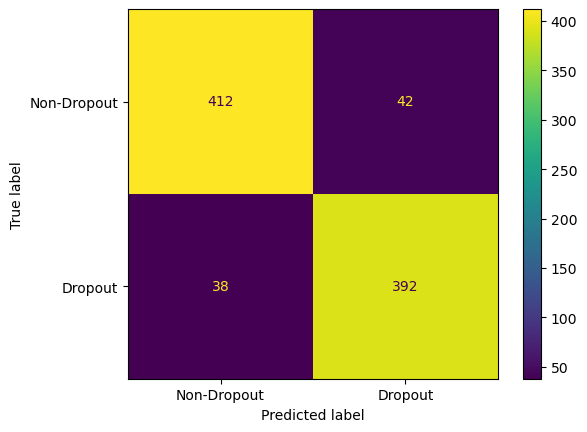

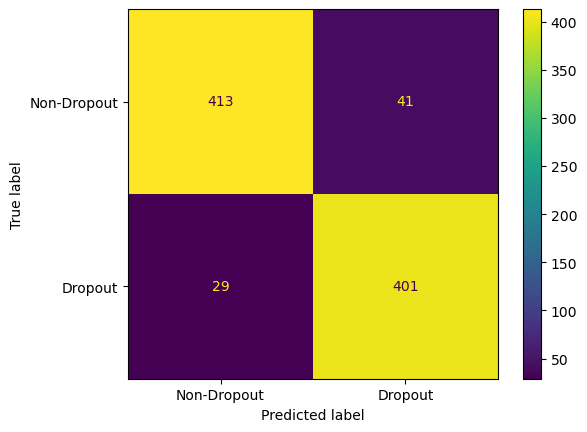

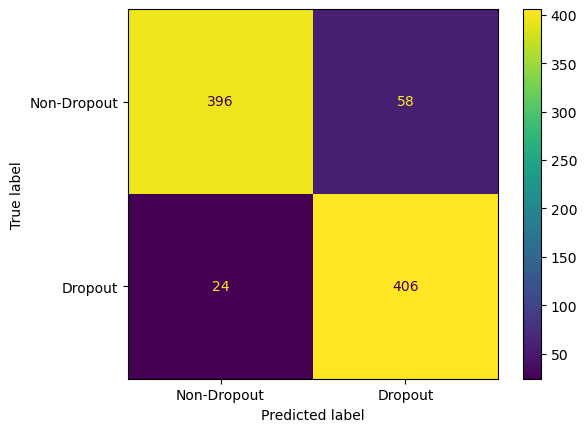

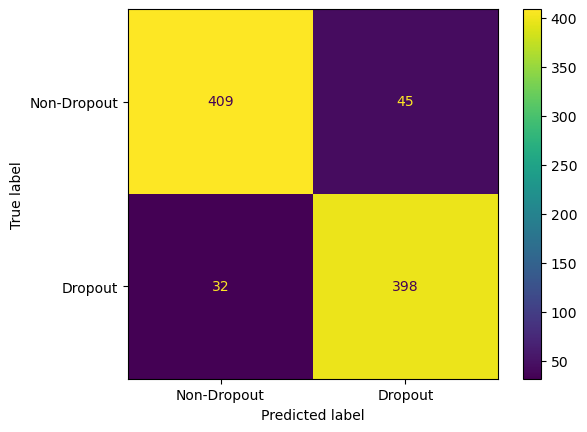

In [21]:
keep_list = [
    "Age at enrollment",
    "Previous qualification (grade)",
    "Admission grade",
    "Nacionality",
    "Gender",
    "Application mode",
    "Educational special needs",
    "Daytime/evening attendance",
    "Course",
    "Curricular units 1st sem (credited)",
    "Curricular units 1st sem (enrolled)",
    "Curricular units 1st sem (evaluations)",
    "Curricular units 1st sem (approved)",
    "Curricular units 1st sem (grade)",
    "Curricular units 1st sem (without evaluations)",
    "Curricular units 2nd sem (credited)",
    "Curricular units 2nd sem (enrolled)",
    "Curricular units 2nd sem (evaluations)",
    "Curricular units 2nd sem (approved)",
    "Curricular units 2nd sem (grade)",
    "Curricular units 2nd sem (without evaluations)"
]
# train the model with the keep list
model_lr_5,model_rf_5 , model_svm_5 ,scaler_5, pred=train_sub_model(keep_list=keep_list)
print("prediction true : ", pred)

#save the model with pickle
pickle.dump(model_lr_5, open('models/model_lr_5.pkl','wb'))
pickle.dump(model_rf_5, open('models/model_rf_5.pkl','wb'))
pickle.dump(model_svm_5, open('models/model_svm_5.pkl','wb'))
pickle.dump(scaler_5, open('models/scaler_5.pkl','wb'))
pickle.dump(keep_list, open('models/features_5.pkl','wb'))



# Sixth Model

Prepare the training data for this first model:

## Selected Columns
Age at enrollment
Previous qualification (grade)
Admission grade
Nacionality
Gender
Debtor
Tuition fees up to date
Scholarship holder
GDP
Application mode
Educational special needs
Daytime/evening attendance
Course
Curricular units 1st sem (credited)
Curricular units 1st sem (enrolled)
Curricular units 1st sem (evaluations)
Curricular units 1st sem (approved)
Curricular units 1st sem (grade)
Curricular units 1st sem (without evaluations)
Curricular units 2nd sem (credited)
Curricular units 2nd sem (enrolled)
Curricular units 2nd sem (evaluations)
Curricular units 2nd sem (approved)
Curricular units 2nd sem (grade)
Curricular units 2nd sem (without evaluations)

## Name of the Model
**basic with financial and full academic**

c:\Users\usalv\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\usalv\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


Logistic Regression:
Accuracy :  0.9230769230769231

 [[414  40]
 [ 28 402]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.94      0.91      0.92       454
           1       0.91      0.93      0.92       430

    accuracy                           0.92       884
   macro avg       0.92      0.92      0.92       884
weighted avg       0.92      0.92      0.92       884

******************************************************

Random Forest:
Accuracy :  0.9242081447963801

 [[416  38]
 [ 29 401]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.93      0.92      0.93       454
           1       0.91      0.93      0.92       430

    a

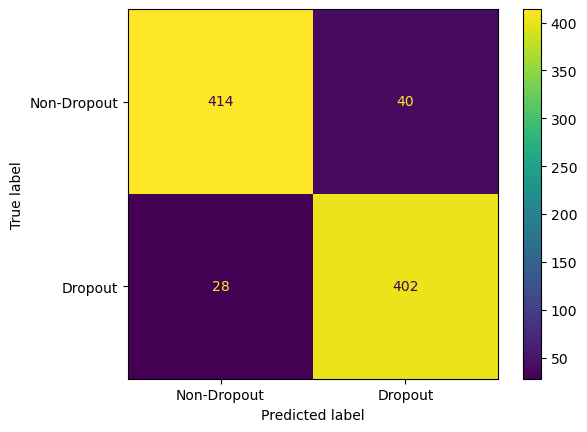

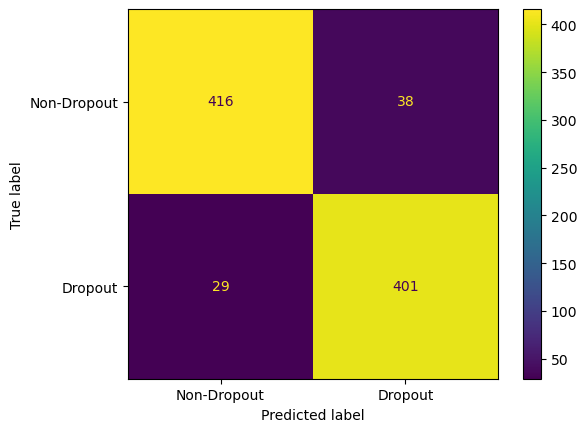

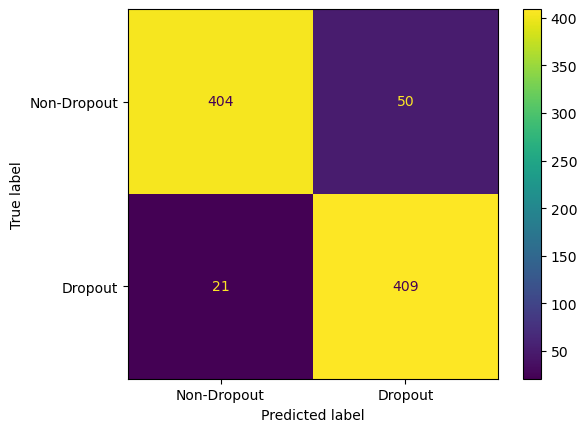

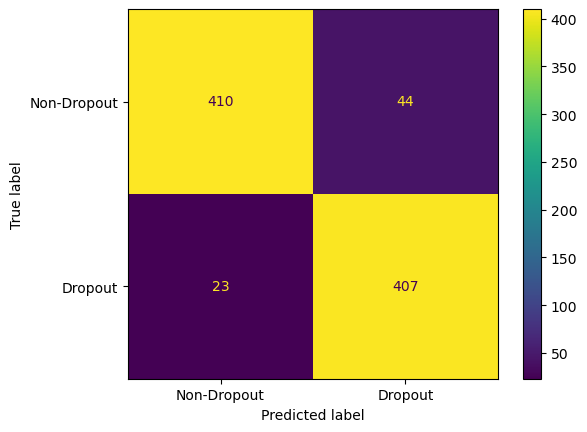

In [22]:
keep_list = [
    "Age at enrollment",
    "Previous qualification (grade)",
    "Admission grade",
    "Nacionality",
    "Gender",
    "Debtor",
    "Tuition fees up to date",
    "Scholarship holder",
    "GDP",
    "Application mode",
    "Educational special needs",
    "Daytime/evening attendance",
    "Course",
    "Curricular units 1st sem (credited)",
    "Curricular units 1st sem (enrolled)",
    "Curricular units 1st sem (evaluations)",
    "Curricular units 1st sem (approved)",
    "Curricular units 1st sem (grade)",
    "Curricular units 1st sem (without evaluations)",
    "Curricular units 2nd sem (credited)",
    "Curricular units 2nd sem (enrolled)",
    "Curricular units 2nd sem (evaluations)",
    "Curricular units 2nd sem (approved)",
    "Curricular units 2nd sem (grade)",
    "Curricular units 2nd sem (without evaluations)"
]
# train the model with the keep list
model_lr_6,model_rf_6 , model_svm_6 ,scaler_6, pred=train_sub_model(keep_list=keep_list)
print("prediction true : ", pred)

#save the model with pickle
pickle.dump(model_lr_6, open('models/model_lr_6.pkl','wb'))
pickle.dump(model_rf_6, open('models/model_rf_6.pkl','wb'))
pickle.dump(model_svm_6, open('models/model_svm_6.pkl','wb'))
pickle.dump(scaler_6, open('models/scaler_6.pkl','wb'))
pickle.dump(keep_list, open('models/features_6.pkl','wb'))




# Seventh Model

Prepare the training data for this first model:

## Selected Columns
every feature

## Name of the Model
**full model**

c:\Users\usalv\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\usalv\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


Logistic Regression:
Accuracy :  0.9287330316742082

 [[416  38]
 [ 25 405]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       454
           1       0.91      0.94      0.93       430

    accuracy                           0.93       884
   macro avg       0.93      0.93      0.93       884
weighted avg       0.93      0.93      0.93       884

******************************************************

Random Forest:
Accuracy :  0.9411764705882353

 [[422  32]
 [ 20 410]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       454
           1       0.93      0.95      0.94       430

    a

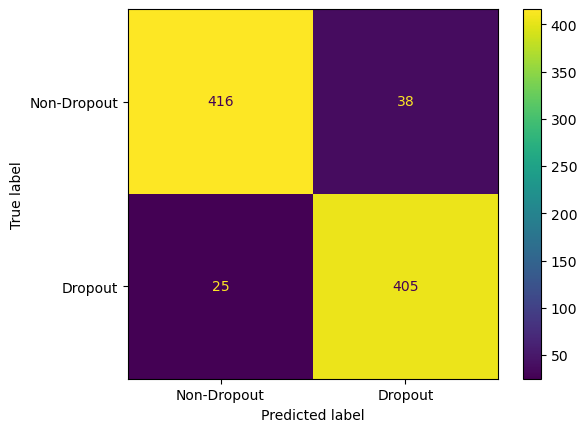

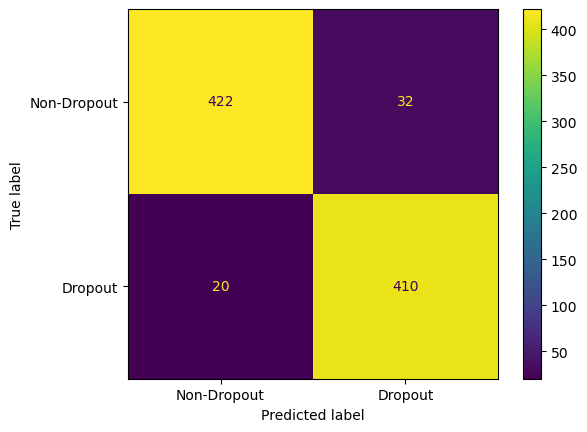

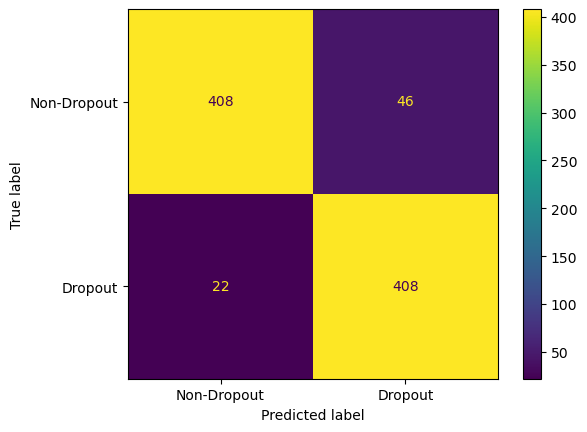

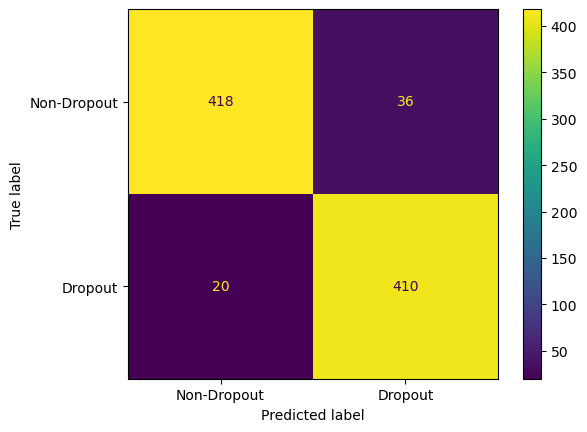

In [23]:
model_lr_7,model_rf_7 , model_svm_7 ,scaler_7, pred=train_sub_model()
print("prediction true : ", pred)

#save the model with pickle
pickle.dump(model_lr_7, open('models/model_lr_7.pkl','wb'))
pickle.dump(model_rf_7, open('models/model_rf_7.pkl','wb'))
pickle.dump(model_svm_7, open('models/model_svm_7.pkl','wb'))
pickle.dump(scaler_7, open('models/scaler_7.pkl','wb'))
pickle.dump(X.columns.tolist(), open('models/features_7.pkl','wb'))


